In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.dummy import DummyClassifier

from sklearn.metrics import classification_report

In [2]:
path = r"dataset\train.csv"

df= pd.read_csv(path)
df.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Braund, Mr. Owen Harris",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
test =df.copy()
test = test.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])
test.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292
Embarked,889,3,S,644,NaN,NaN,NaN,NaN,NaN,NaN,NaN


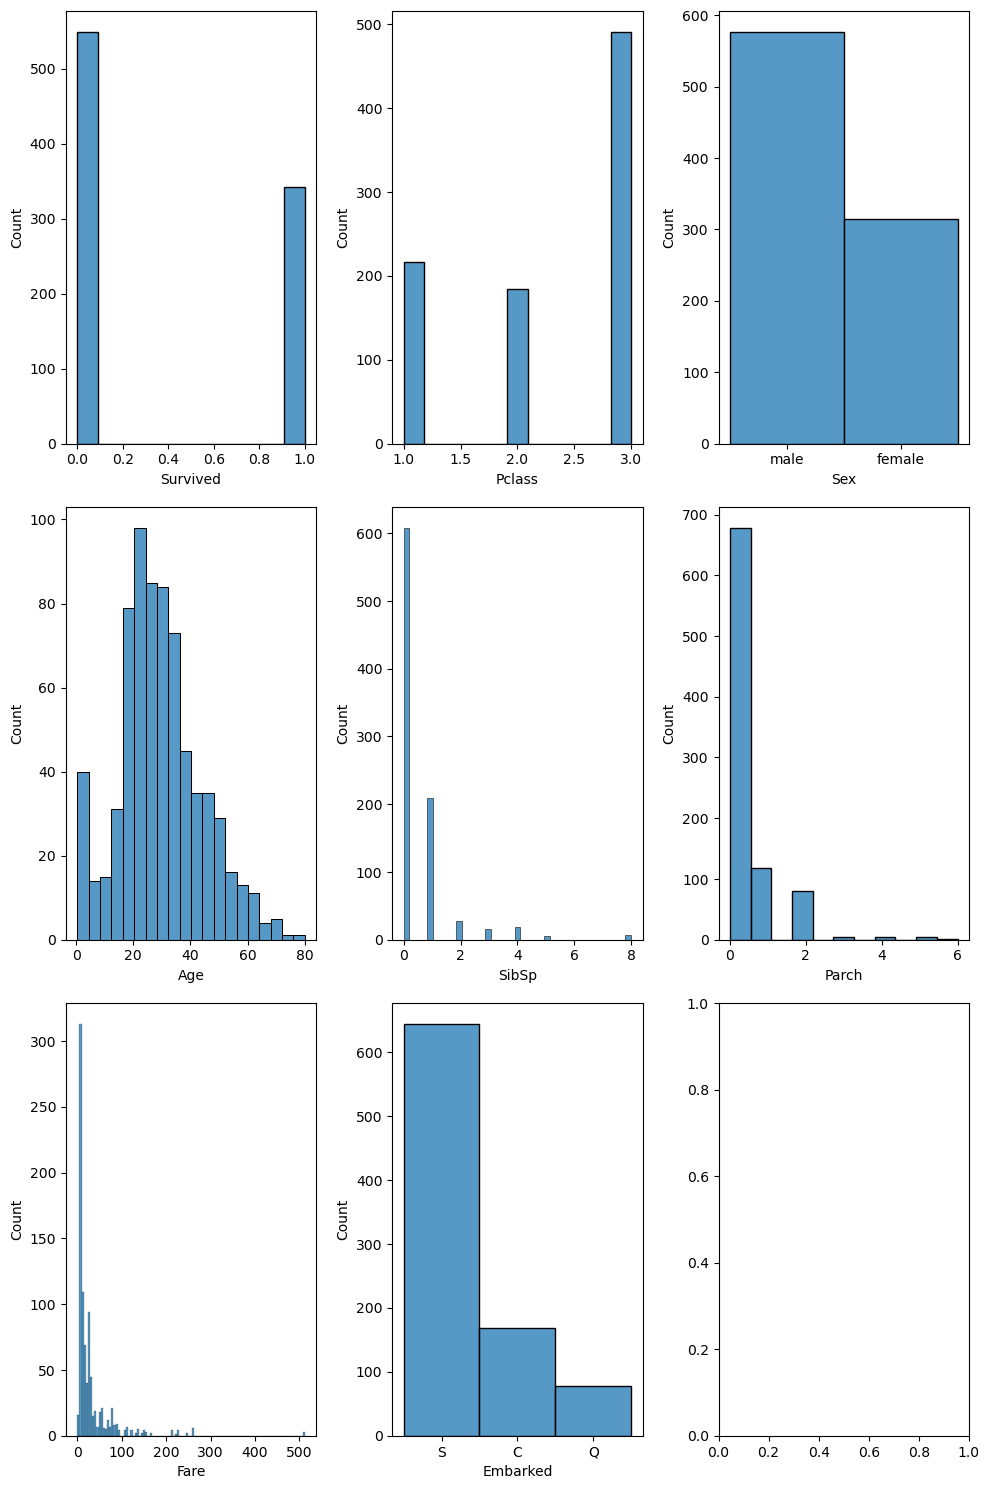

In [4]:
fig, axs = plt.subplots(ceil(len(test.columns) / 3), 3, figsize=(10, 15))
for i, index in enumerate(test.columns):
    ax = axs.flatten()[i]
    sns.histplot(data=df, x=index, ax=ax)
fig.tight_layout()

In [13]:
# Encode categorical columns
test["Sex"] = test["Sex"].map({key: val for val, key in enumerate(test["Sex"].unique())})
test["Embarked"] = test["Embarked"].map({key: val for val, key in enumerate(test["Embarked"].unique())})

X = test.drop(columns=["Survived"])
y = test["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [19]:
preProcessor = make_pipeline(StandardScaler(), SimpleImputer())
X_train = preProcessor.fit_transform(X_train)
X_test = preProcessor.transform(X_test)

In [25]:
# Gradient Boosting Classifier
gbc_classifier = GradientBoostingClassifier()

gbc_param_grid = {
    "loss": ["exponential", "log_loss"],
    "criterion": ["friedman_mse", "squared_error"],
}

gbc_grid = GridSearchCV(gbc_classifier, gbc_param_grid, cv=10, n_jobs=3)
gbc_grid.fit(X_train, y_train)
gbc_model = gbc_grid.best_estimator_
print(gbc_model.get_params())
for label, results in classification_report(y_test, gbc_model.predict(X_test), output_dict=True).items():
  if type(results) is dict:
    for k, v in results.items():
      print(f"%s: %0.2f" % (label + '-' + k, v))
  else:
    print(f"%s: %0.2f" % (label, results))

{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'exponential', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
0-precision: 0.83
0-recall: 0.94
0-f1-score: 0.88
0-support: 163.00
1-precision: 0.88
1-recall: 0.70
1-f1-score: 0.78
1-support: 105.00
accuracy: 0.84
macro avg-precision: 0.85
macro avg-recall: 0.82
macro avg-f1-score: 0.83
macro avg-support: 268.00
weighted avg-precision: 0.85
weighted avg-recall: 0.84
weighted avg-f1-score: 0.84
weighted avg-support: 268.00
